<a href="https://colab.research.google.com/github/niroj547/AI/blob/main/Worksheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [ ]:
import pandas as pd
#Task1
df = pd.read_csv("/content/drive/MyDrive/Database/bank .csv")

#Task2 (a)
object_columns = df.select_dtypes(include='object').columns
print("Columns with dtype=object:", object_columns)

#(b)
unique_values = {col: df[col].unique() for col in object_columns}
for col, values in unique_values.items():
    print(f"Column: {col}, Unique Values: {values}")

#(c)
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

#Task3(a)
df_numeric = df.drop(columns=object_columns)

#(b)
df_numeric.to_csv("banknumericdata.csv", index=False)

#Task4
df_numeric_loaded = pd.read_csv("banknumericdata.csv")

summary_stats = df_numeric_loaded.describe()
print("Summary Statistics:\n", summary_stats)







Columns with dtype=object: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Column: job, Unique Values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Column: marital, Unique Values: ['married' 'single' 'divorced']
Column: education, Unique Values: ['tertiary' 'secondary' 'unknown' 'primary']
Column: default, Unique Values: ['no' 'yes']
Column: housing, Unique Values: ['yes' 'no']
Column: loan, Unique Values: ['no' 'yes']
Column: contact, Unique Values: ['unknown' 'cellular' 'telephone']
Column: month, Unique Values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Column: poutcome, Unique Values: ['unknown' 'failure' 'other' 'success']
Column: y, Unique Values: ['no' 'yes']
Null values in each column:
 age          0
job          0
marital      0
education    0
default      

#Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
#Task1
df = pd.read_csv("/content/drive/MyDrive/Database/medical_students_dataset.csv")

#Task2
print(df.info())

missing_values = df.isnull().sum()
print("Columns with missing values:\n", missing_values)

#Task3
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Filled missing values in column '{col}' with mean.")

for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing values in column '{col}' with mode.")

#Task4(a)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#(b)
df = df.drop_duplicates()
print(f"Dataset after removing duplicates has {df.shape[0]} rows and {df.shape[1]} columns.")





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Columns with missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight         

<ipython-input-2-321ea5cd975c>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-2-321ea5cd975c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Filled missing values in column 'Smoking' with mode.
Number of duplicate rows: 12572
Dataset after removing duplicates has 187428 rows and 13 columns.


#Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
null_age_count = df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_age_count}")
df = df.dropna(subset=['Age'])
print(f"Dataset after dropping rows with null 'Age' values has {df.shape[0]} rows.")


Number of null values in the 'Age' column: 0
Dataset after dropping rows with null 'Age' values has 187428 rows.


#Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton

In [5]:
# 1
titanic_df = pd.read_csv("/content/drive/MyDrive/Database/Titanic-Dataset.csv")

# 2
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')

# 3
titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)

# 4
titanic_df.drop(columns=['Embarked'], inplace=True)

# 5
print(titanic_df.head())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


#Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean survival rates by gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-6-3a0c29d77451>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values, palette='coolwarm')


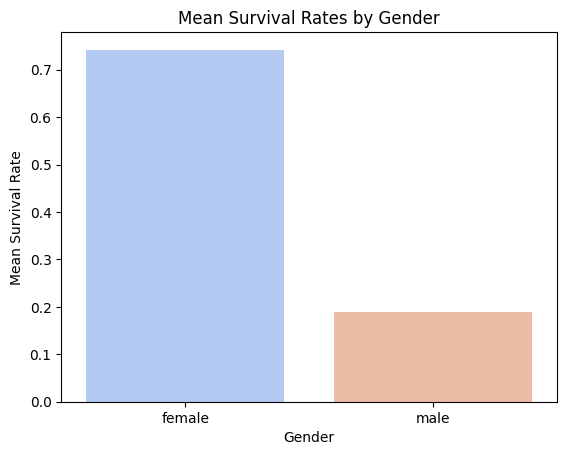

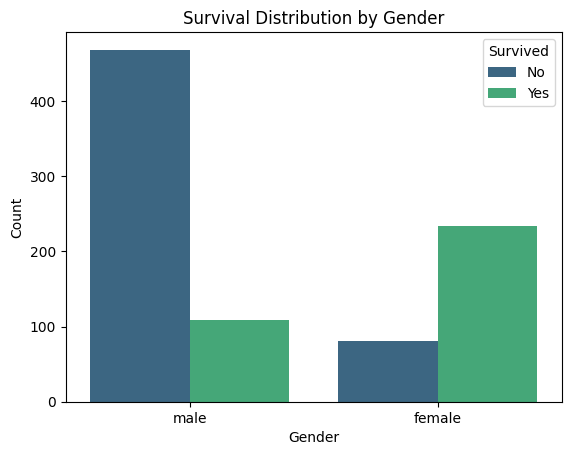

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1
titanic_df = pd.read_csv("/content/drive/MyDrive/Database/Titanic-Dataset.csv")

# 2
mean_survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:\n", mean_survival_by_gender)

# 3
sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values, palette='coolwarm')
plt.title("Mean Survival Rates by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Survival Rate")
plt.show()

# 4
sns.countplot(data=titanic_df, x='Sex', hue='Survived', palette='viridis')
plt.title("Survival Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


#Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

<ipython-input-7-6adcd8dbb34d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna('Unknown', inplace=True)
<ipython-input-7-6adcd8dbb34d>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


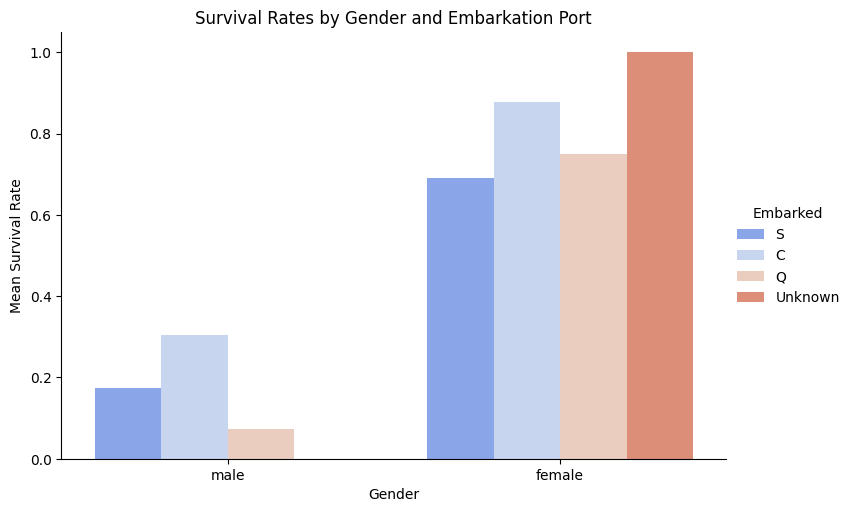

In [7]:
# 1
titanic_df = pd.read_csv("/content/drive/MyDrive/Database/Titanic-Dataset.csv")

# 2.
titanic_df['Embarked'].fillna('Unknown', inplace=True)

# 3.
sns.catplot(
    data=titanic_df,
    kind="bar",
    x="Sex",
    y="Survived",
    hue="Embarked",
    palette="coolwarm",
    ci=None,
    height=5,
    aspect=1.5
)

plt.title("Survival Rates by Gender and Embarkation Port")
plt.xlabel("Gender")
plt.ylabel("Mean Survival Rate")
plt.show()
